# Assignment 3

1. Follow the instruction below and then report how the performance changed.(apply all at once)

• Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function.

• Dropout layer at 20%.

• Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function.

• Max Pool layer with size 2×2.

• Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.

• Dropout layer at 20%.

• Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.

• Max Pool layer with size 2×2.

• Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function.

• Dropout layer at 20%.

• Convolutional layer,128 feature maps with a size of 3×3 and a rectifier activation function.

• Max Pool layer with size 2×2.

• Flatten layer.

• Dropout layer at 20%.

• Fully connected layer with 1024 units and a rectifier activation function.

• Dropout layer at 20%.

• Fully connected layer with 512 units and a rectifier activation function.

• Dropout layer at 20%.

• Fully connected output layer with 10 units and a Softmax activation function

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Activation,Dense,Dropout,Conv2D,Flatten,MaxPooling2D
from keras.datasets import cifar10
from keras import optimizers
from keras.optimizers import SGD
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [3]:
num_classes = 10
input_shape = x_train.shape[1:4]
# Compile the model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [4]:
one_hot_y_train = keras.utils.to_categorical(y_train,num_classes=num_classes)
one_hot_y_test = keras.utils.to_categorical(y_test,num_classes=num_classes)

(32, 32, 3)


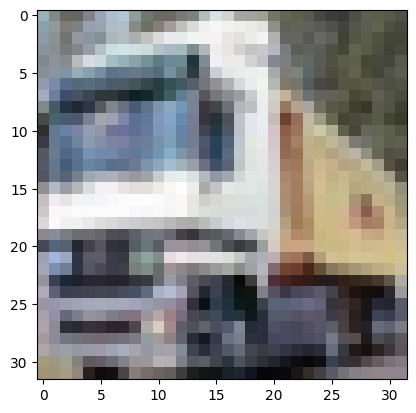

In [5]:
plt.imshow(x_train[1])
print(x_train[1].shape)

In [6]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=input_shape,padding='same'))
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [7]:
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)         73856     
__________

In [9]:
history = model.fit(x=x_train,y=one_hot_y_train, batch_size=512,epochs=5,verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/5
50000/50000 [==============================] - 168s 3ms/step - loss: 14.4306 - acc: 0.0999
Epoch 2/5
50000/50000 [==============================] - 165s 3ms/step - loss: 14.5063 - acc: 0.1000
Epoch 3/5
50000/50000 [==============================] - 175s 3ms/step - loss: 14.5063 - acc: 0.1000
Epoch 4/5
50000/50000 [==============================] - 176s 4ms/step - loss: 14.5063 - acc: 0.1000
Epoch 5/5
50000/50000 [==============================] - 177s 4ms/step - loss: 14.5063 - acc: 0.1000


In [11]:
print(model.metrics_names)
model.evaluate(x=x_test,y=one_hot_y_test,batch_size=512)

['loss', 'acc']
10000/10000 [==============================] - 6s 599us/step


[14.50629168701172, 0.10000000005960465]

2. Predict the first 4 images of the test data using the above model. Then, compare with the actual label for those 4
images to check whether or not the model has predicted correctly.

predict class: 3
expected class: 5


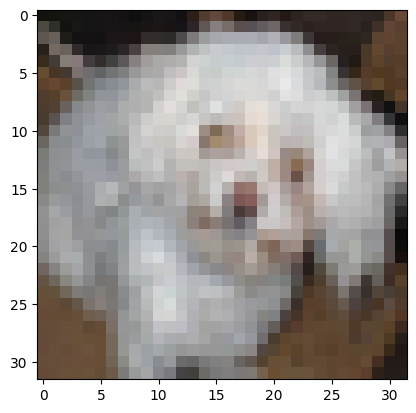

In [12]:
# predict
plt.imshow(x_test[1000])

result = model.predict(x_test[1000:1001]).tolist()
predict = 0
expect = y_test[1000][0]
for i,_ in enumerate(result[0]):
    if result[0][i] > result[0][predict]:
        predict = i
print("predict class:",predict)
print("expected class:",expect)

predict class: 3
expected class: 0


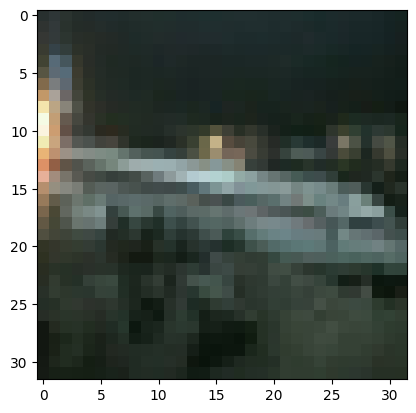

In [13]:
# predict
plt.imshow(x_test[1001])

result = model.predict(x_test[1001:1002]).tolist()
predict = 0
expect = y_test[1001][0]
for i,_ in enumerate(result[0]):
    if result[0][i] > result[0][predict]:
        predict = i
print("predict class:",predict)
print("expected class:",expect)

predict class: 3
expected class: 8


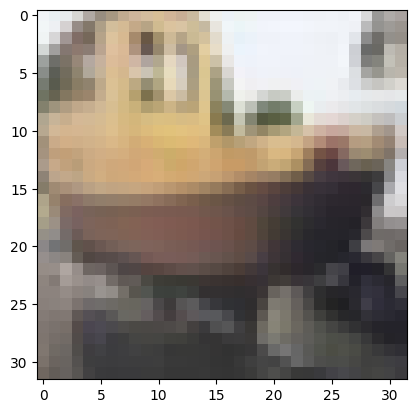

In [14]:
# predict
plt.imshow(x_test[1002])

result = model.predict(x_test[1002:1003]).tolist()
predict = 0
expect = y_test[1002][0]
for i,_ in enumerate(result[0]):
    if result[0][i] > result[0][predict]:
        predict = i
print("predict class:",predict)
print("expected class:",expect)

predict class: 3
expected class: 4


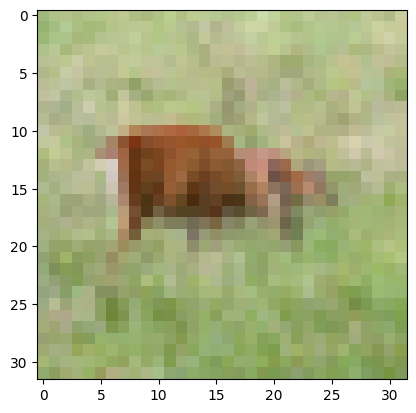

In [15]:
# predict
plt.imshow(x_test[1003])

result = model.predict(x_test[1003:1004]).tolist()
predict = 0
expect = y_test[1003][0]
for i,_ in enumerate(result[0]):
    if result[0][i] > result[0][predict]:
        predict = i
print("predict class:",predict)
print("expected class:",expect)

predict class: 3
expected class: 8


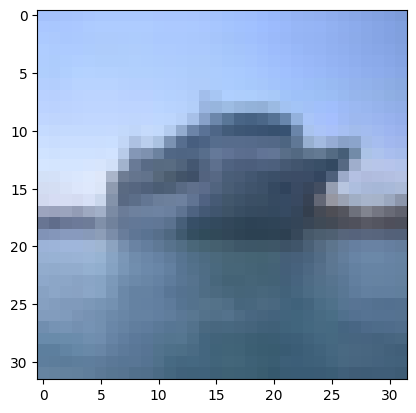

In [16]:
# predict
plt.imshow(x_test[1004])

result = model.predict(x_test[1000:1004]).tolist()
predict = 0
expect = y_test[1004][0]
for i,_ in enumerate(result[0]):
    if result[0][i] > result[0][predict]:
        predict = i
print("predict class:",predict)
print("expected class:",expect)

In [17]:
model.save("keras-VGG16-cifar10.h5")

3. Visualize Loss and Accuracy using the history object

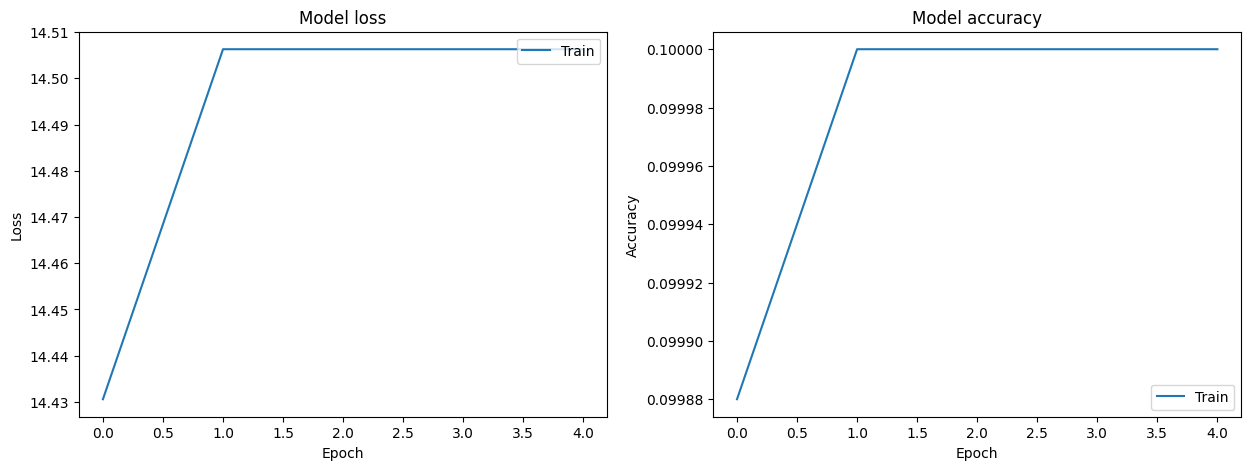

In [19]:
import matplotlib.pyplot as plt

# Plot the results
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot training and validation accuracy
axs[1].plot(history.history['acc'])
axs[1].set_title('Model accuracy')
axs[1].set_ylabel('Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Test'], loc='lower right')

# Plot training and validation loss
axs[0].plot(history.history['loss'])
axs[0].set_title('Model loss')
axs[0].set_ylabel('Loss')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Test'], loc='upper right')

plt.show()


In [20]:
import numpy as np
y_predictions1 = model.predict(x_test)
y_predictions1.reshape(-1,)
y_predictions1= np.argmax(y_predictions1, axis=1)
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, y_predictions1)

array([[   0,    0,    0, 1000,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1000,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1000,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1000,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1000,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1000,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1000,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1000,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1000,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1000,    0,    0,    0,    0,    0,    0]],
      dtype=int64)

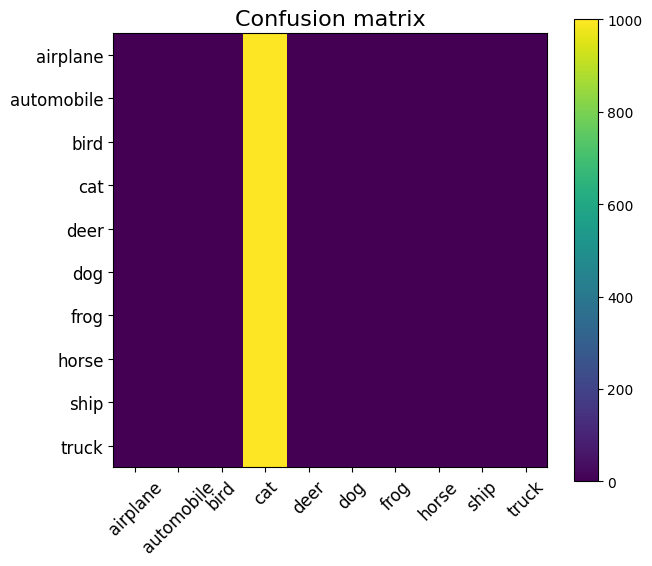

In [21]:
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions1))
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()